# 프로젝트명: 데이터 수집 실습 1 (BeautifulSoup4)

#### 📌 BeautifulSoup는 정적인 사이트 수집에 주로 사용되며, html 태그의 데이터들을 가져옵니다.
- BeautifulSoup - 정적, Selenium - 동적
- BeautifulSoup의 단점은 웹 페이지에 스크롤로 움직여야지 데이터가 나오는 구조에선 사용하기 어렵습니다.

#### 🚨 주의사항
- 데이터 수집을 싫어하는 사이트의 정책 존중하기
- 많은 요청은 서버에서 차단할 수 있으니, time.sleep(5) 실행해서 서버 과부하 예방하기

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

### 1. requests로 데이터 가져오기

In [2]:
url = "https://weworkremotely.com/remote-full-time-jobs"
response = requests.get(url)

## 해당 URL을 요청했을때 정상적으로 응답이 왔는지 확인
if response.status_code == 200:
    print("성공")
else :
    print("실패")

성공


### 2. BS4 사용하기

In [4]:
soup = BeautifulSoup(response.content, 'html.parser')

### 2-1. BS 주요 메소드 
- find : 정의한 요소 1개만 찾아줍니다.
- find_all : 정의한 요소들을 다 찾아줍니다.

![태그의클래스](https://file.notion.so/f/f/4e4750b9-2973-47f2-9fe5-8330ce1f2c19/6fc7e475-b001-44df-a496-121d3d506968/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA_2024-05-21_%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB_6.42.27.png?id=6b7322b7-4d70-4722-b7ee-ecbd0a3ec2ac&table=block&spaceId=4e4750b9-2973-47f2-9fe5-8330ce1f2c19&expirationTimestamp=1716328800000&signature=4NAiaIoGcyPep2pY3unz-Rqv1yKlP0iJJAqzFeMnwrs&downloadName=%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA+2024-05-21+%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB+6.42.27.png)

In [5]:
item_table = soup.find('section', class_='jobs')

jobs_items = item_table.find_all('li')
jobs_items


[<li class="feature"><span class="new">New</span><div class="highlight-bar"></div><div class="tooltip--flag-logo"><a href="/company/lemon-io"><div alt="Lemon.io is hiring a remote Senior Java Full-stack Developer at We Work Remotely." class="flag-logo" loading="lazy" style="background-image:url(https://we-work-remotely.imgix.net/logos/0076/3337/logo.gif?ixlib=rails-4.0.0&amp;w=50&amp;h=50&amp;dpr=2&amp;fit=fill&amp;auto=compress)"></div><span class="tooltiptext">View Company Profile</span></a></div><div class="clickable-element d-none d-md-block" data-bs-target="#HomeApplyModal" data-bs-toggle="modal" onclick="trackModalClick()" style="cursor: pointer;"><span class="company">Lemon.io</span><object><a href="/top-remote-companies" style="display: inline-block;"><span class="listing-pill" style="background: #dde0f4;">Top 100</span></a></object><br/><span class="title">Senior Java Full-stack Developer</span><span class="featured">featured</span><br/><span class="company">Full-Time</span><s

In [6]:
### BS4의 chaining을 이용하여 데이터 추출
jobs = soup.find('section', class_='jobs').find_all('li')
jobs


In [ ]:
### ✅ 데이터 추출 함수화 하면, 그때 공개하기 🚨 마지막[-1] 제외
jobs = soup.find('section', class_='jobs').find_all('li')[:-1]
jobs


---------------------------------------------
### 3. 데이터 추출하기

In [10]:
### 1. find, find_all 중에 어떤걸 사용할까?
### 2. ✅ html 구조를 보고 어떤 태그를 사용할지 결정하기

### jobs의 첫번째 데이터로 추출하는 로직 짜기
jobs[0].find("span", class_="company").text

'Lemon.io'

In [11]:
jobs[0].find("span", class_="title").text

'Senior Java Full-stack Developer'

In [13]:
jobs[0].find_all("span", class_="company")

[<span class="company">Lemon.io</span>,
 <span class="company">Full-Time</span>,
 <span class="region company">Latin America Only/Europe Only/UK Only/Canada Only/Asia Only/Oceania Only</span>,
 <span class="company">Lemon.io</span>,
 <span class="company">Full-Time</span>,
 <span class="region company">Latin America Only/Europe Only/UK Only/Canada Only/Asia Only/Oceania Only</span>]

In [15]:
jobs[0].find_all("span", class_="company")[1].text

'Full-Time'

In [17]:
jobs[0].find("span", class_="region").text

'Latin America Only/Europe Only/UK Only/Canada Only/Asia Only/Oceania Only'

In [25]:
### 🚨 jobs의 첫번째는 클릭시 홍보배너가 오픈되므로, 예제할땐 두번째 데이터 사용하기
jobs[0].find_all("a")[1]["href"] 

'/top-remote-companies'

In [24]:
jobs[1].find_all("a")[1]["href"]

'/remote-jobs/rebelcode-lead-developer'

In [21]:
for job in jobs:
    company = job.find("span", class_="company").text
    title = job.find("span", class_="title").text
    work_type = job.find_all("span", class_="company")[1].text
    region = job.find("span", class_="region").text
    company_url = f'https://weworkremotely.com/{job.find_all("a")[1]["href"]}'

    job_data = {
        'company': company,
        'title': title,
        'work_type': work_type,
        'region': region,
        'company_url': company_url
    }
    # print(job_data)

In [22]:
job_data

{'company': 'Web3 Jobs',
 'title': 'Senior Ruby on Rails Developer',
 'work_type': 'Full-Time',
 'region': 'USA Only',
 'company_url': 'https://weworkremotely.com//remote-jobs/web3-jobs-senior-ruby-on-rails-developer'}

### 4. 몇페이지 까지 있는지 확인하기

In [26]:
page_url = 'https://weworkremotely.com/remote-full-time-jobs?page=1'
page_response = requests.get(page_url)
page_soup = BeautifulSoup(page_response.content, 'html.parser')

![태그의클래스1](https://file.notion.so/f/f/4e4750b9-2973-47f2-9fe5-8330ce1f2c19/870c79e8-1f31-4b4d-84af-6123711ea938/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA_2024-05-21_%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB_7.24.28.png?id=5c5a7236-d4a2-40ba-91ea-ccadc7b3bd2f&table=block&spaceId=4e4750b9-2973-47f2-9fe5-8330ce1f2c19&expirationTimestamp=1716336000000&signature=DJX1cnPgM3d1Xviir93vOTgTA3tmUCQiPCNgvnSPGTA&downloadName=%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA+2024-05-21+%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB+7.24.28.png)

In [27]:
page_num = page_soup.find("span", class_="pages-container with_next_last")\
                    .find_all("span")

In [28]:
page_num

[<span class="page current"> 1 </span>,
 <span class="page"><a href="/remote-full-time-jobs?page=2" rel="next">2</a></span>,
 <span class="page"><a href="/remote-full-time-jobs?page=3">3</a></span>]

In [30]:
def get_page_num():
    page_url = 'https://weworkremotely.com/remote-full-time-jobs?page=1'
    page_response = requests.get(page_url)
    ## 해당 URL을 요청했을때 정상적으로 응답이 왔는지 확인
    if response.status_code == 200:
        print("성공")
    else :
        print("실패")
    page_soup = BeautifulSoup(page_response.content, 'html.parser')
    page_num = page_soup.find("span", class_="pages-container with_next_last")\
                    .find_all("span")
    return len(page_num)

In [31]:
max_page_num = get_page_num()

성공


### 5. 데이터 파싱 함수 만들기

In [32]:
def parsing_data(url):

    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    jobs = soup.find('section', class_='jobs').find_all('li')[:-1]

    total_jobs = []
    for job in jobs:
        company = job.find("span", class_="company").text
        title = job.find("span", class_="title").text
        work_type = job.find_all("span", class_="company")[1].text
        region = job.find("span", class_="region").text
        company_url = f'https://weworkremotely.com/{job.find_all("a")[1]["href"]}'

        job_data = {
            'company': company,
            'title': title,
            'work_type': work_type,
            'region': region,
            'company_url': company_url
        }
        total_jobs.append(job_data)

    return total_jobs

In [33]:
total_data = []
for num in range(max_page_num):
    print(num+1)
    url = f'https://weworkremotely.com/remote-full-time-jobs?page={num+1}'
    result = parsing_data(url)
    total_data.extend(result)

1
2
3


In [34]:
import pandas as pd

df = pd.DataFrame(total_data)

In [35]:
df

,company,title,work_type,region,company_url
0,Lemon.io,Senior Java Full-stack Developer,Full-Time,Latin America Only/Europe Only/UK Only/Canada ...,https://weworkremotely.com//top-remote-companies
1,RebelCode,Lead Developer,Full-Time,Anywhere in the World,https://weworkremotely.com//remote-jobs/rebelc...
2,SocialHub,Full Stack Developer - Remote/SaaS (m/f/d),Full-Time,Anywhere in the World,https://weworkremotely.com//remote-jobs/social...
3,SocialHub,Backend Javascript / Node.js Developer - Remot...,Full-Time,Anywhere in the World,https://weworkremotely.com//remote-jobs/social...
4,"BURNETTE, DOBSON & PINCHAK",Executive Assitant to the CEO,Full-Time,Anywhere in the World,https://weworkremotely.com//remote-jobs/burnet...
...,...,...,...,...,...
127,Sanctuary Computer,Experienced Full-stack Developer,Full-Time,Anywhere in the World,https://weworkremotely.com//remote-jobs/sanctu...
128,Salesmsg,Head of Customer Success (SaaS) 🤝🏻 💸 😄,Full-Time,Anywhere in the World,https://weworkremotely.com//remote-jobs/salesm...
129,Flag Theory,Client Onboarding for Corporate Services (Bank...,Full-Time,Europe Only,https://weworkremotely.com//remote-jobs/flag-t...
130,BBE Marketing Inc,Full-Stack Wordpress Developer,Full-Time,Anywhere in the World,https://weworkremotely.com//remote-jobs/bbe-ma...


In [14]:
df.to_csv('weworkremotely.csv', index=False)

In [36]:
df.drop_duplicates(subset=['company', 'title'], inplace=True)

In [38]:
df.to_clipboard(index=False)

### https://remoteok.com/ 수집하기 실습

- User-Agent

In [19]:
challenge_url = "https://remoteok.com/remote-python-jobs"
response = requests.get(challenge_url)

## 해당 URL을 요청했을때 정상적으로 응답이 왔는지 확인
if response.status_code == 200:
    print("성공")
else :
    print("실패")

response.content

실패


b'<html>\n<head><title>503 Service Temporarily Unavailable</title></head>\n<body>\n<center><h1>503 Service Temporarily Unavailable</h1></center>\n<hr><center>nginx</center>\n</body>\n</html>\n'

### User-Agent 찾는 법

- User-Agent에선 브라우저가 누구인지 서버에게 전달한다

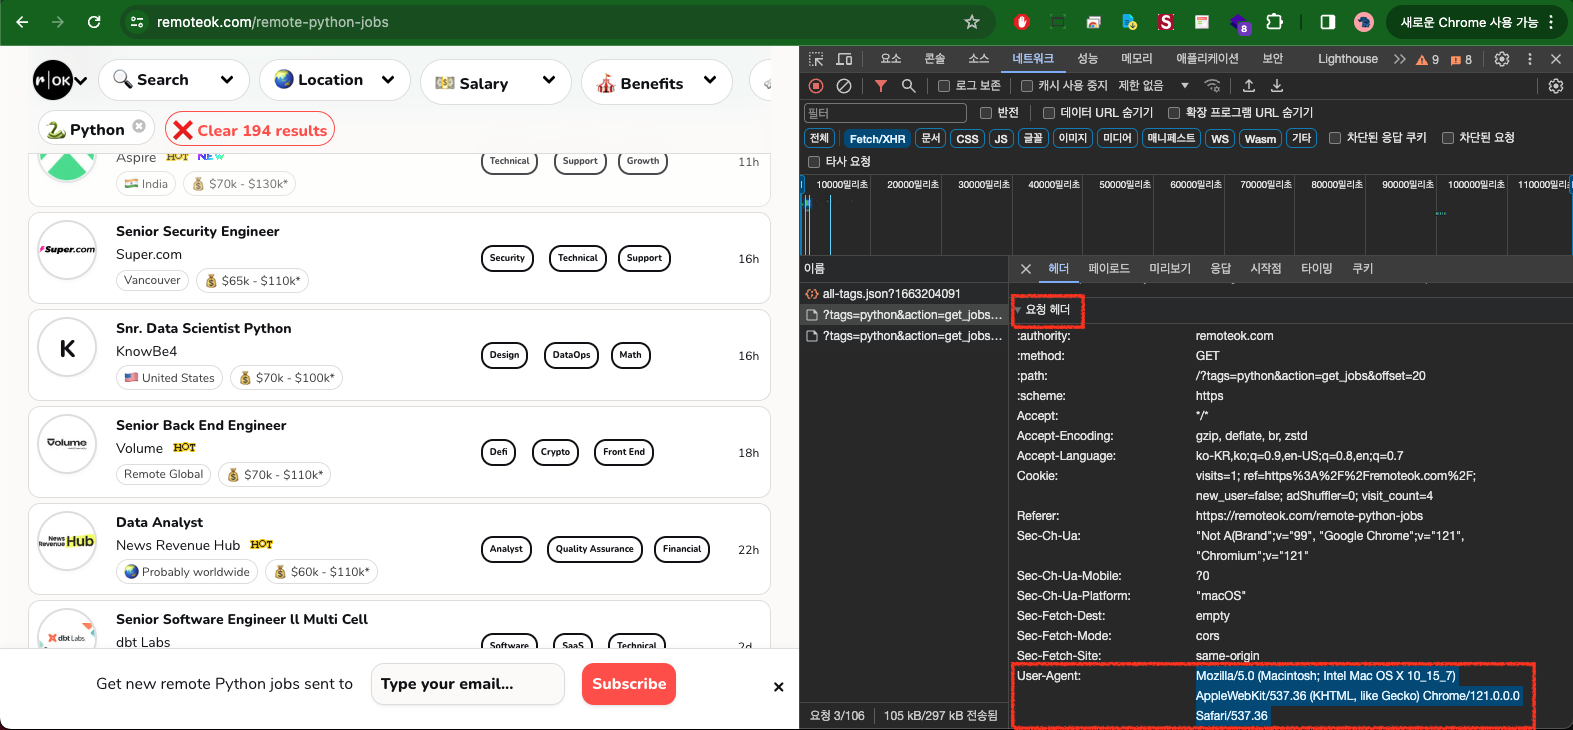

In [21]:
## 이미지 삽입
from IPython.display import Image
Image('img/user_agent.png')